# Import Library (Modules dan Packages)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import time 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.stem.snowball import SnowballStemmer

import joblib
import pickle

In [32]:
data = pd.read_csv("urldataset-baru+200-16-features.csv")

# Import Dataset

# Exploratory Data Analysis (EDA)

In [33]:
data

,URL,Label,https_scheme,http_scheme,domain_length,len_non_alphabet_domain,count_question_mark_domain,count_ampersand_domain,count_asterisk_domain,len_subdomain,len_non_alphabet_subdomain,len_special_char_subdomain,count_dot_subdomain,count_dash_subdomain,ratio_url_path,count_subdomain,hostname_length,path_len
0,https://pogodasub.com/2Ge6I0rd/4p0OksK6-inteli...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,13,37
1,https://pogodasub.com/2Ge6I0rd/Ly6I98Se-ipko/l...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,13,33
2,https://pogodasub.com/2Ge6I0rd/hz6hZnA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,13,17
3,https://resicorphome.com/brian/srr/austin/,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,16,18
4,https://kurier24-oplata.com/PzVxLK7l/WdJslUDi-...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,19,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259843,https://email.mail1.onesignal.os.tc/c/eJwUz7Fu...,1,0,0,1,1,0,0,0,1,1,1,1,0,0,1.0,27,351
259844,https://email.m.teachable.com/c/eJw0zzFuxCAQRu...,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0.5,21,274
259845,https://www.gvomail.com/redir.php?mail.pial=27...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,15,10
259846,https://apac01.safelinks.protection.outlook.co...,1,0,0,1,1,0,0,0,1,1,1,1,0,1,1.0,39,1


In [34]:
data['Label'].unique()

array([0, 1], dtype=int64)

In [35]:
print('Total Jumlah url:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] Good\t\t:', data[data.Label == 0].shape[0], 'data url')
print('-- [1] Phishing\t\t:', data[data.Label == 1].shape[0], 'data url\n')

Total Jumlah url: 259848 data

terdiri dari (label):
-- [0] Good		: 106522 data url
-- [1] Phishing		: 153326 data url



In [36]:
data.duplicated().sum()

0

In [37]:
data.isnull().sum()

URL                           0
Label                         0
https_scheme                  0
http_scheme                   0
domain_length                 0
len_non_alphabet_domain       0
count_question_mark_domain    0
count_ampersand_domain        0
count_asterisk_domain         0
len_subdomain                 0
len_non_alphabet_subdomain    0
len_special_char_subdomain    0
count_dot_subdomain           0
count_dash_subdomain          0
ratio_url_path                0
count_subdomain               0
hostname_length               0
path_len                      0
dtype: int64

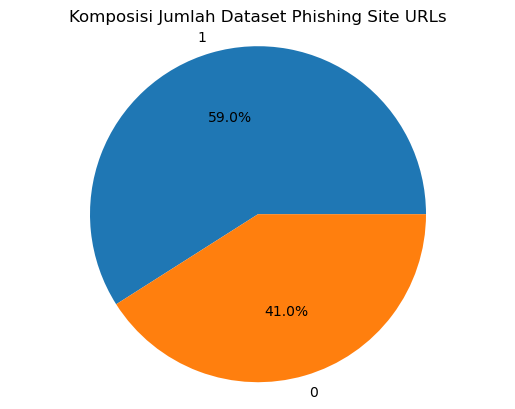

In [38]:
# Konversi data menjadi DataFrame
df = pd.DataFrame(data, columns=['Label'])

# Hitung jumlah masing-masing label
label_count = df['Label'].value_counts()

# Buat pie chart menggunakan Seaborn
plt.title('Komposisi Jumlah Dataset Phishing Site URLs')
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%')

# Tampilkan pie chart
plt.axis('equal')
plt.show()

# Feature Engineering

In [15]:
# importing required packages for this section
from urllib.parse import urlparse
import re

In [16]:
# https in scheme
def httpsURL(url):
  # Parse the URL to extract the scheme/protocol
  parsed_url = urlparse(url)
  scheme = parsed_url.scheme

  # Check if the scheme/protocol is "https"
  if scheme == "https":
    return 0  # Legitimate
  else:
    return 1  # Phishing

In [17]:
# http in scheme
def httpURL(url):
  # Parse the URL to extract the scheme/protocol
  parsed_url = urlparse(url)
  scheme = parsed_url.scheme

  # Check if the scheme/protocol is "https"
  if scheme == "http":
    return 1 # Phishing
  else:
    return 0  # Legitimate

In [18]:
# Domain of the URL (Domain)
def getDomain(url):
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
    domain = domain.replace("www.","")
  return domain

In [19]:
# Fungsi untuk memeriksa jumlah ? dalam domain URL
def count_question_mark_domain(url):
    domain = getDomain(url)
    count_question_mark_count = domain.count('?')
    return 0 if count_question_mark_count == 0 else 1

In [20]:
# Fungsi untuk memeriksa jumlah & dalam domain URL
def count_ampersand_domain(url):
    domain = getDomain(url)
    count_ampersand_count = domain.count('&')
    return 0 if count_ampersand_count == 0 else 1

In [21]:
# Fungsi untuk memeriksa jumlah * dalam domain URL
def count_asterisk_domain(url):
    domain = getDomain(url)
    count_asterisk_count = domain.count('*')
    return 0 if count_asterisk_count == 0 else 1

In [22]:
# Fungsi untuk menghitung rasio panjang URL terhadap panjang path
def calculate_url_path_ratio(url):
    parsed_url = urlparse(url)
    path = parsed_url.path
    if len(path) == 0:
        return 0
    else:
        ratio = len(url) / len(path)
        if ratio < 3:
            return 0
        else:
            return 1

In [23]:
# Fungsi untuk menghitung panjang path
def length_path(url):
    parsed_url = urlparse(url)
    path = parsed_url.path
    return len(path)

# Menentukan Features dan Target

In [39]:
# Predictor Variables
X = data[['https_scheme', 'http_scheme', 'count_question_mark_domain','count_ampersand_domain','count_asterisk_domain', 
          'ratio_url_path', 'path_len']]

#Target Variable
y = data['Label']

# Splitting Dataset - Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

# Modelling

## Logistic Regression

In [41]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

# Evaluation

## Classification Report

In [42]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.86      0.92      0.89     21305
     Class 1       0.94      0.89      0.92     30665

    accuracy                           0.90     51970
   macro avg       0.90      0.91      0.90     51970
weighted avg       0.91      0.90      0.90     51970



## Train Test Evaluation

In [43]:
score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.2f" % score)

accuracy:   0.90


In [44]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)

In [45]:
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 90.16 %
Akurasi Model (Test)  : 90.36 %


## K-Fold Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 5
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 90.21%


## Confusion Matrix

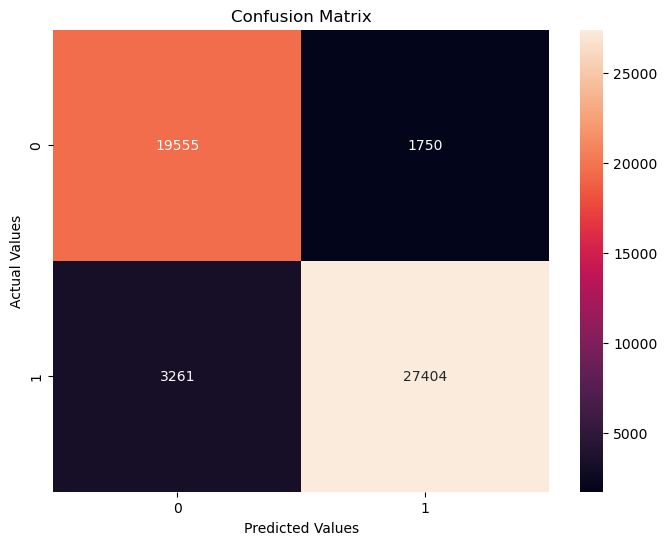

In [47]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Save Model Logistic Regression

In [48]:
import joblib
joblib.dump((logreg), "model_phishing_lr.model")

['model_phishing_lr.model']

# Prediction

In [54]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))
    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(length_path(url))

    return status

In [55]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [56]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
               'https://www.detik.com/edu/detikpedia/d-5728385/11-contoh-teks-artikel-serta-langkah-langkah-penulisannya',
               'https://shopee.co.id/CELANA-PANJANG-BAHAN-DASAR-BAHAN-KAIN-BAHAN-FORMAL-PRIA-i.1052386097.23756536881?publish_id=&sp_atk=b871503b-c1a4-4763-bfc3-bb2196ba4aa7&xptdk=b871503b-c1a4-4763-bfc3-bb2196ba4aa7'
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
************************
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
GOOD
GOOD
PHISHING


C:\Users\hilya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\hilya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\hilya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\hilya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\hilya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\hilya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X d